In [1]:
% matplotlib inline
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

UsageError: Line magic function `%` not found.



Bad key "text.kerning_factor" on line 4 in
/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


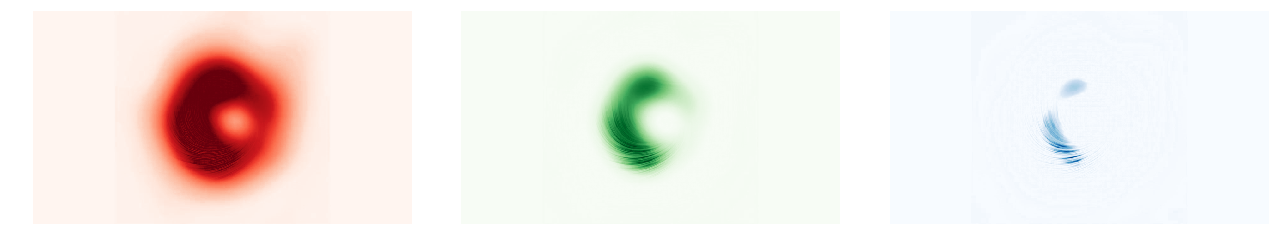

In [2]:
#RGB_Channels
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pylab as plt
im = Image.open("BH.jpg")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

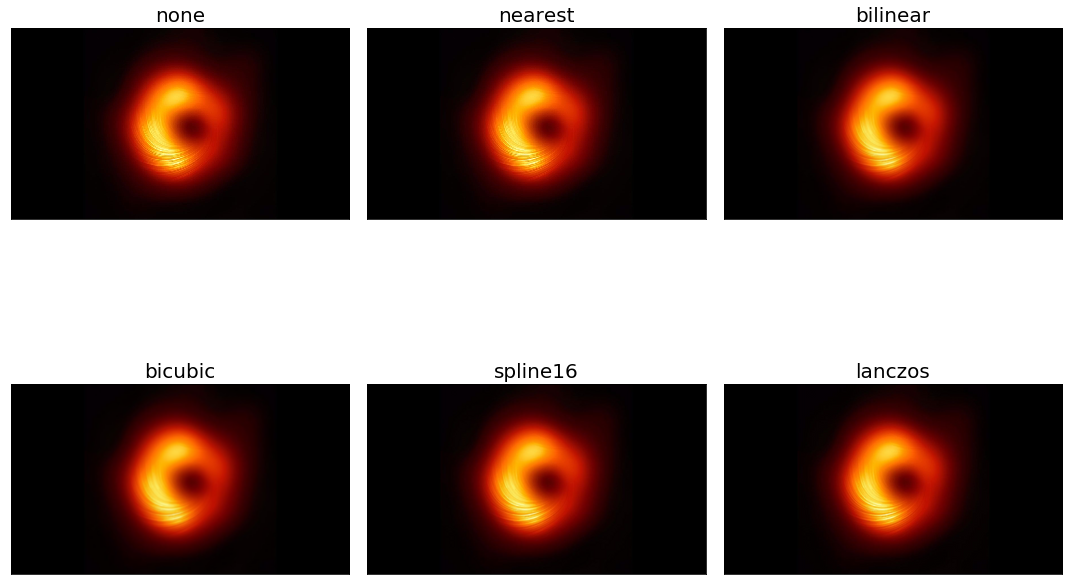

In [3]:
import matplotlib.image as mpimg
im = mpimg.imread("BH.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

0.16.2


/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Viewer requires Qt
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

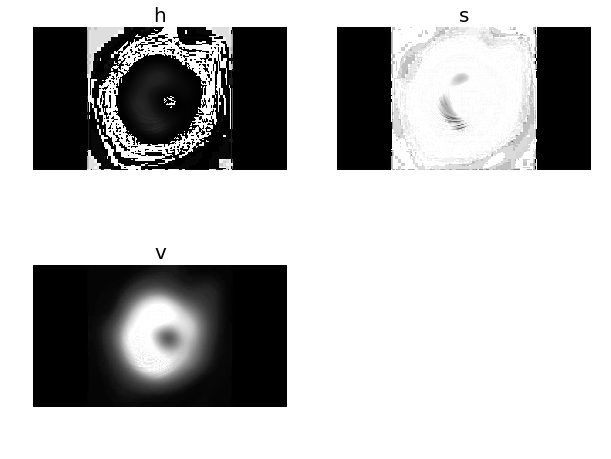

In [4]:
#Converting from one color space into another
import skimage
print(skimage.__version__)
from skimage import color, viewer, exposure, img_as_float, data
im = mpimg.imread("BH.jpg")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()

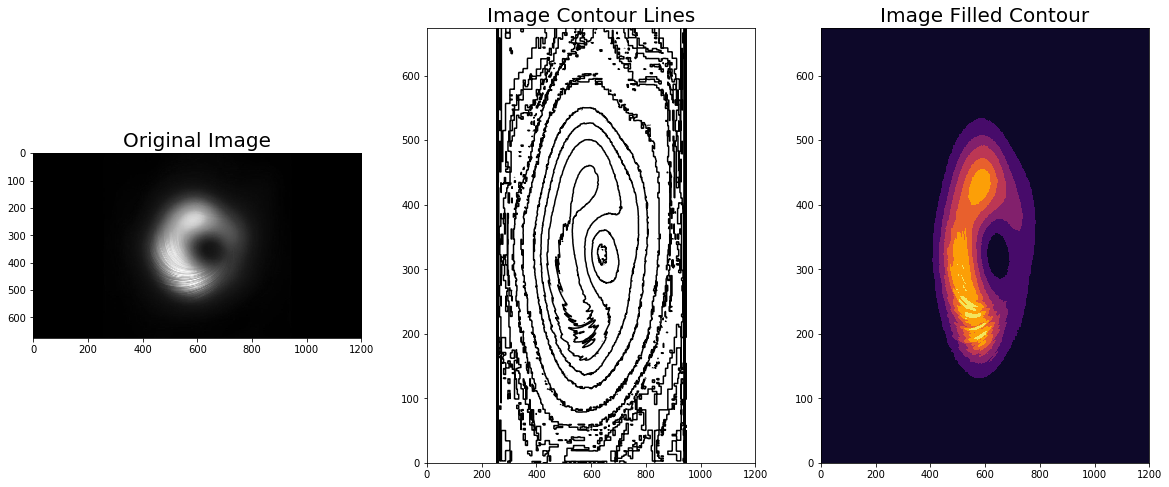

In [8]:
import numpy as np
#Drawing contour lines for an image
from skimage.color import rgb2gray
im = rgb2gray(mpimg.imread("BH.jpg")) # read the image from disk as a numpy ndarray
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k',
levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()

In [14]:
import numpy as np
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

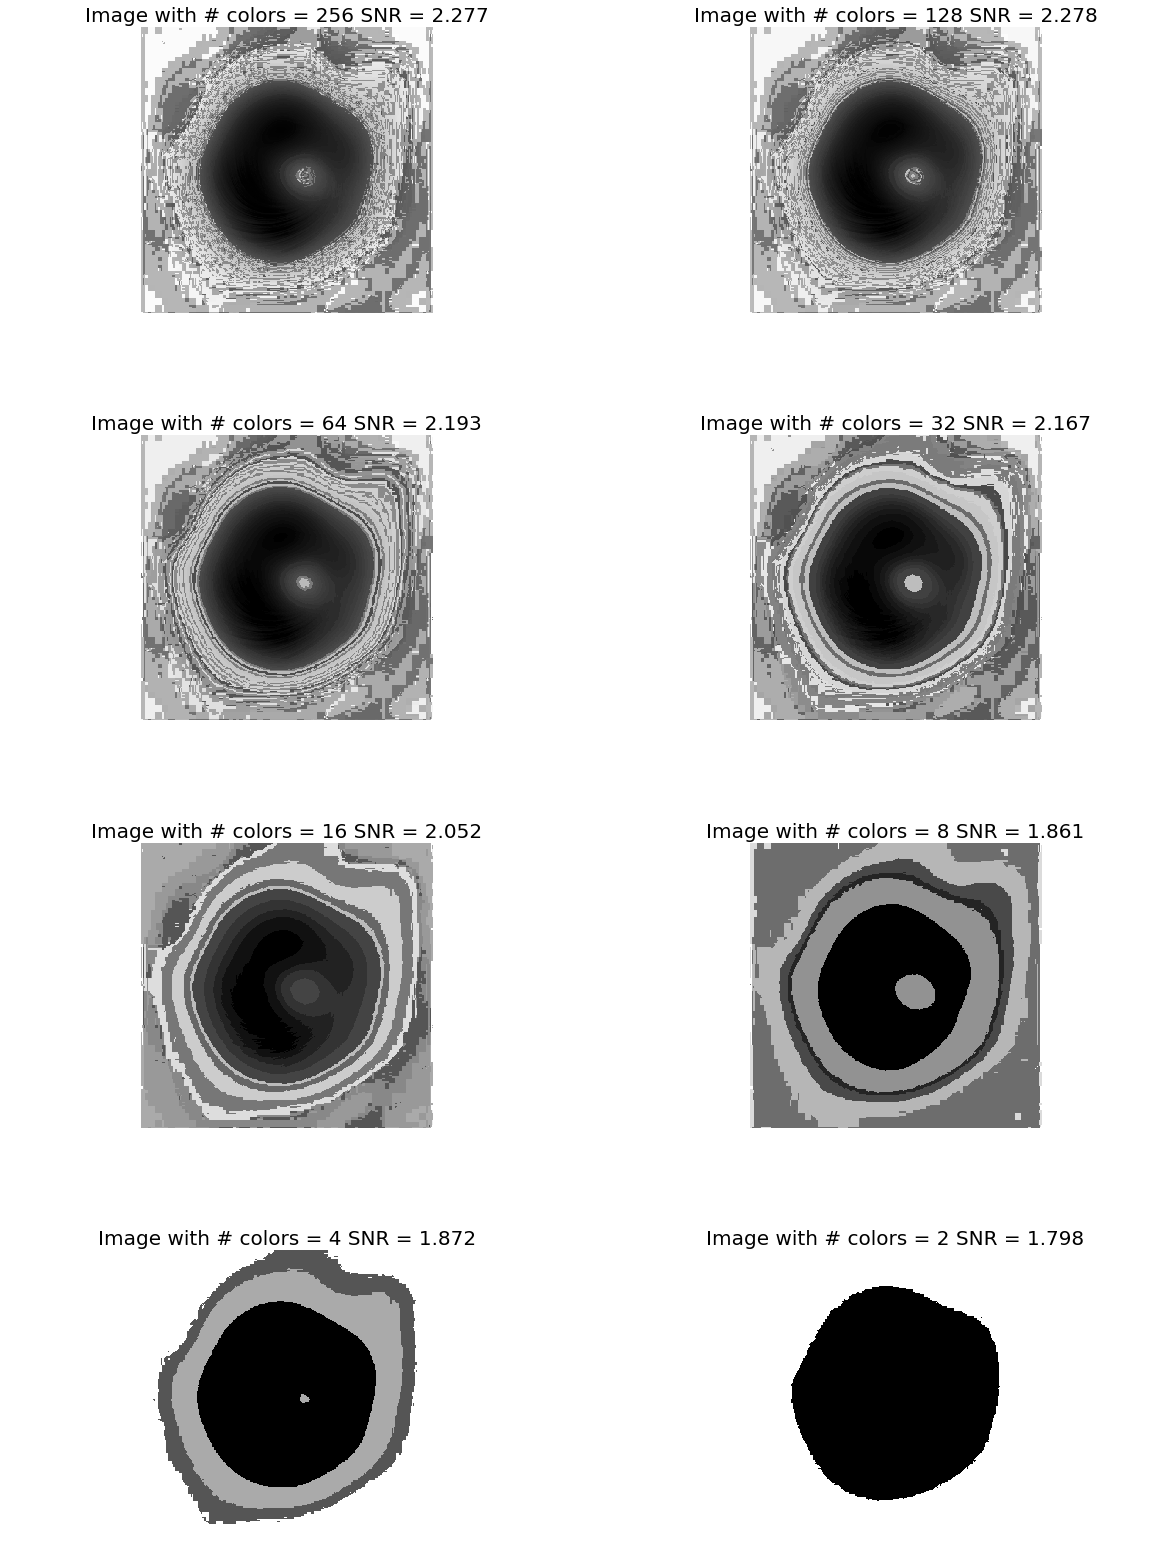

In [15]:
#quantizing_with_PIL
import matplotlib.pylab as pylab
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
im = Image.open('BH.jpg')
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
    str(np.round(snr_list[i-1],3)), size=20)
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

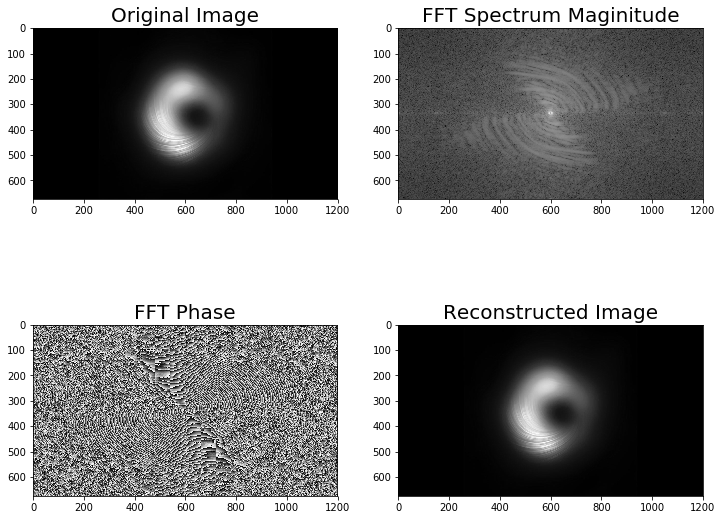

In [16]:
#FFT with the numpy.fft module
import numpy.fft as fp
im1 = rgb2gray(imread('BH.jpg'))
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

0.9796423529411765
(675, 1200)


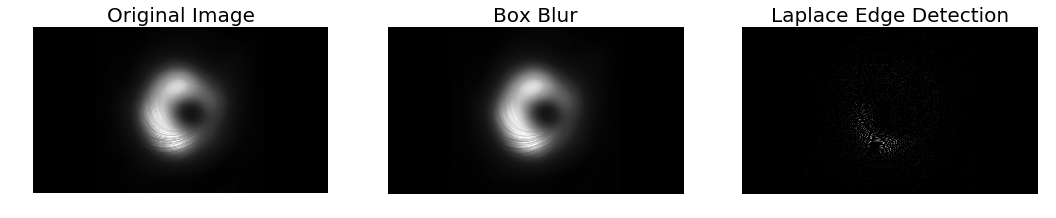

In [17]:
#Applying convolution to greyscale image
im = rgb2gray(imread('BH.jpg')).astype(float)
print(np.max(im))
print(im.shape)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

1.0
(675, 1200, 3)


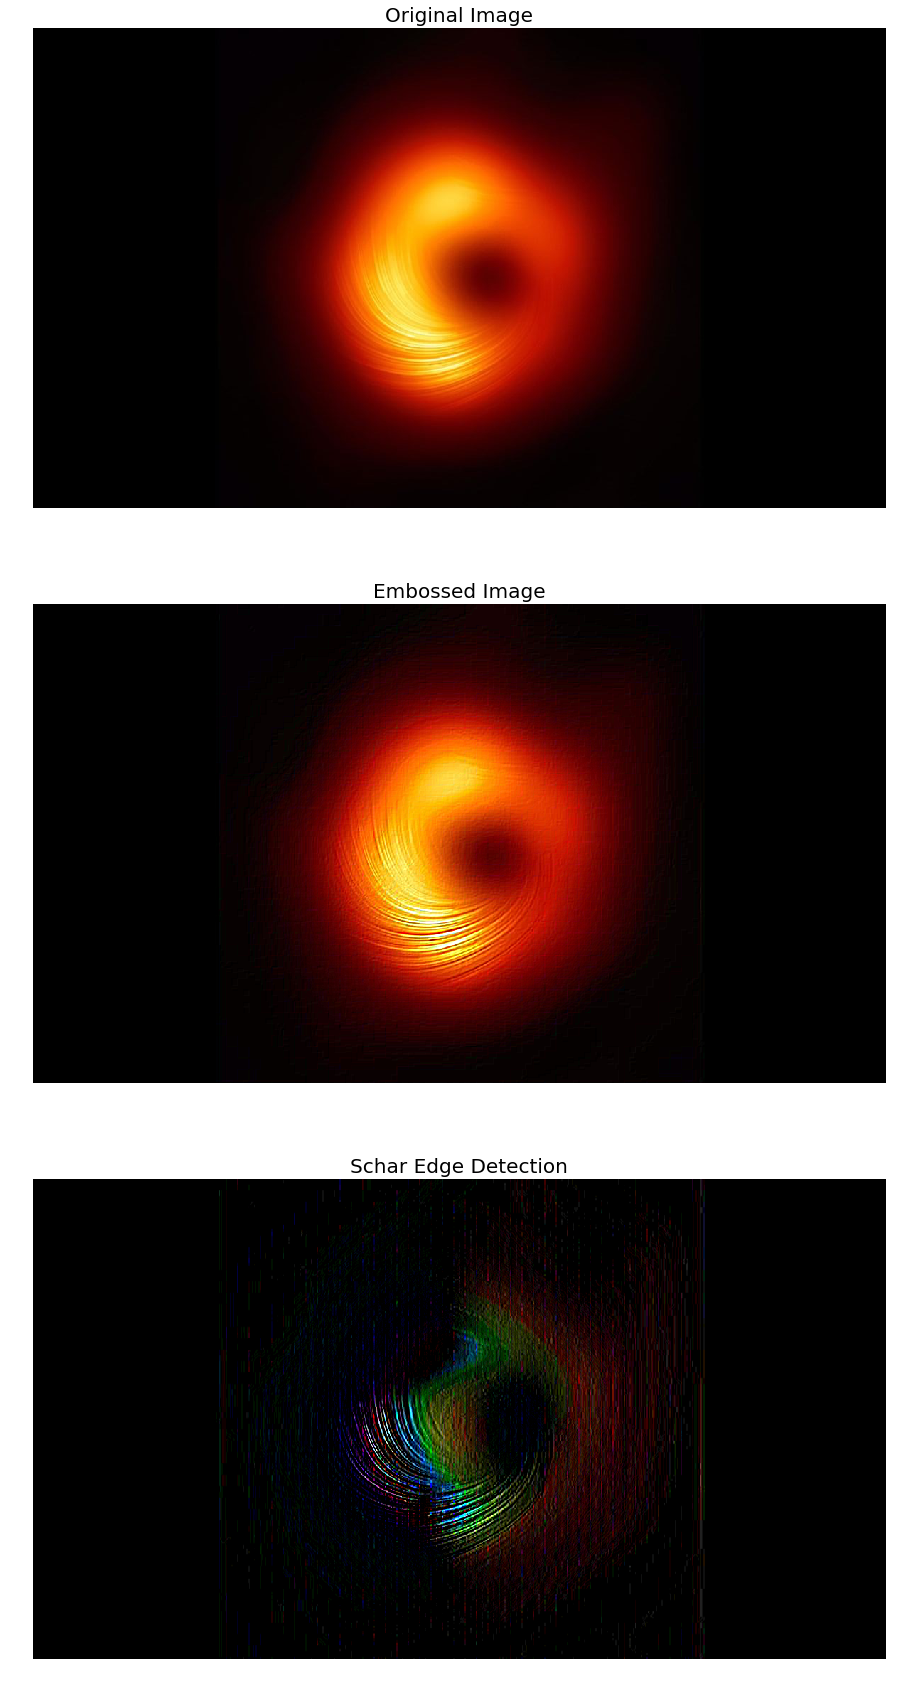

In [19]:
#Applying convolution to RGB image
im = mpimg.imread('BH.jpg')/255 # scale each pixel value in [0,1]
print(np.max(im))
print(im.shape)
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
edge_schar_kernel = np.array([[ -3-3j, 0-10j, +3 -3j], [-10+0j, 0+ 0j, +10+0j], [ -3+3j, 0+10j, +3 +3j]])
im_embossed = np.ones(im.shape)
im_edges = np.ones(im.shape)
for i in range(3):
    im_embossed[...,i] = np.clip(signal.convolve2d(im[...,i], emboss_kernel, mode='same', boundary="symm"),0,1)
for i in range(3):
    im_edges[:,:,i] = np.clip(np.real(signal.convolve2d(im[...,i], edge_schar_kernel, mode='same', boundary="symm")),0,1)
fig, axes = pylab.subplots(nrows=3, figsize=(20, 30))
axes[0].imshow(im)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_embossed)
axes[1].set_title('Embossed Image', size=20)
axes[2].imshow(im_edges)
axes[2].set_title('Schar Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

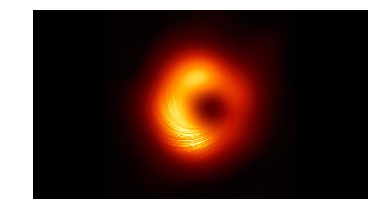

0.6519775626695902


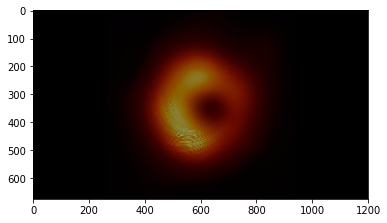

In [25]:
#Bandpassfilter with DOG
from skimage import img_as_float
im = img_as_float(pylab.imread('BH.jpg'))
pylab.figure(), pylab.imshow(im), pylab.axis('off'), pylab.show()
x = np.linspace(-2, 2, 5)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure(), pylab.imshow(np.clip(im, 0, 1)), print(np.max(im)),
pylab.show()

In [26]:
#image_restoration
im = 255*rgb2gray(imread('BH.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 3),
signal.gaussian(im.shape[1], 3))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize

249.80880000000002 255.0


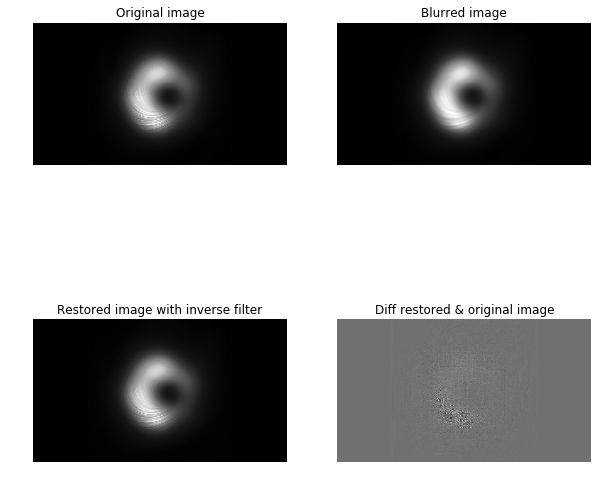

In [27]:
epsilon = 10**-6
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))
pylab.figure(figsize=(10,10))
pylab.gray()
pylab.subplot(221), pylab.imshow(im), pylab.title('Original image'), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_blur), pylab.title('Blurred image'), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_restored - im), pylab.title('Diff restored & original image'), pylab.axis('off')
pylab.show()

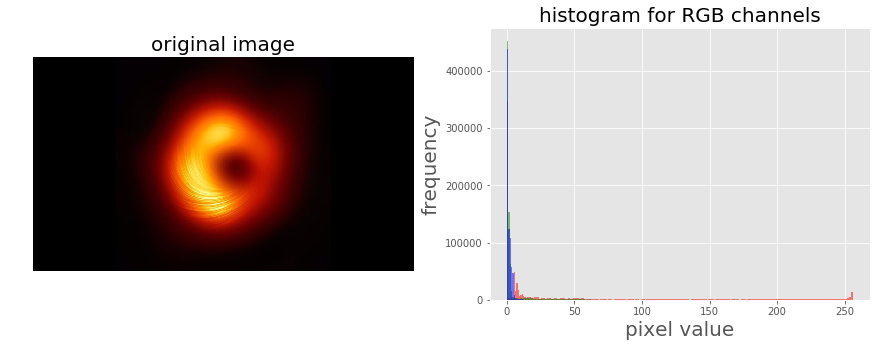

In [29]:
#Logtransform
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)
    
im = Image.open("BH.jpg")
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

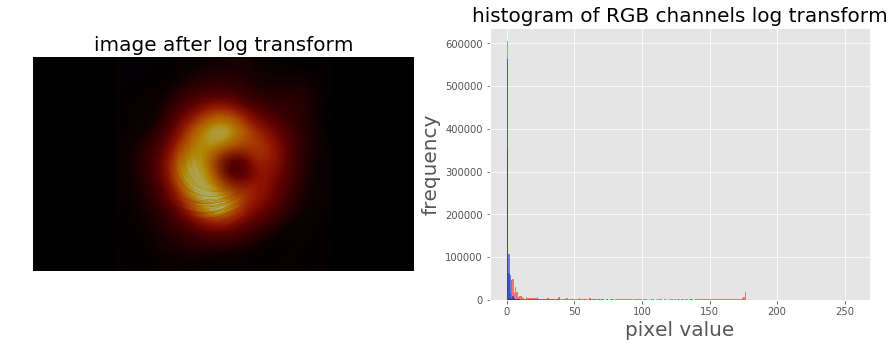

In [30]:
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'image after log transform')
pylab.subplot(122), plot_hist(im_r, im_g, im_b, 'histogram of RGB channels log transform')
pylab.show()

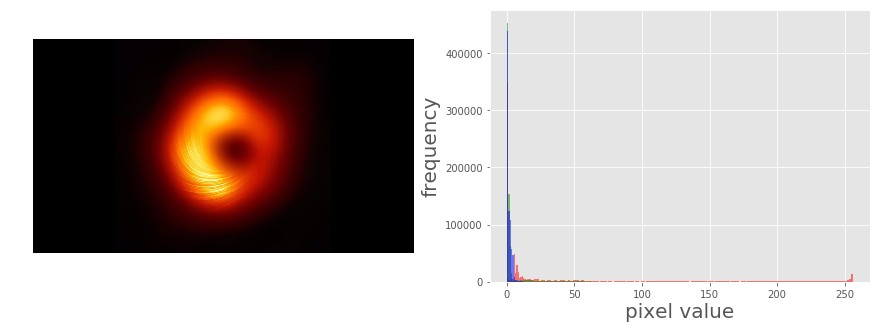

In [32]:
### Contrast stretching with PIL as a point operation
im = Image.open('BH.jpg')
im_r, im_g, im_b= im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
plot_image(im)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.show()

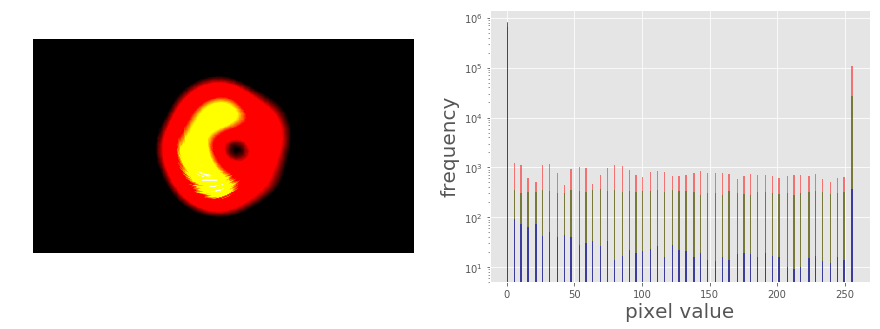

In [34]:
def contrast(c):
    return 0 if c < 70 else (255 if c > 150 else (255*c - 22950) / 48) # piece-wise linear function

im1 = im.point(contrast)
im_r, im_g, im_b = im1.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
plot_image(im1)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.yscale('log',basey=10)
pylab.show()

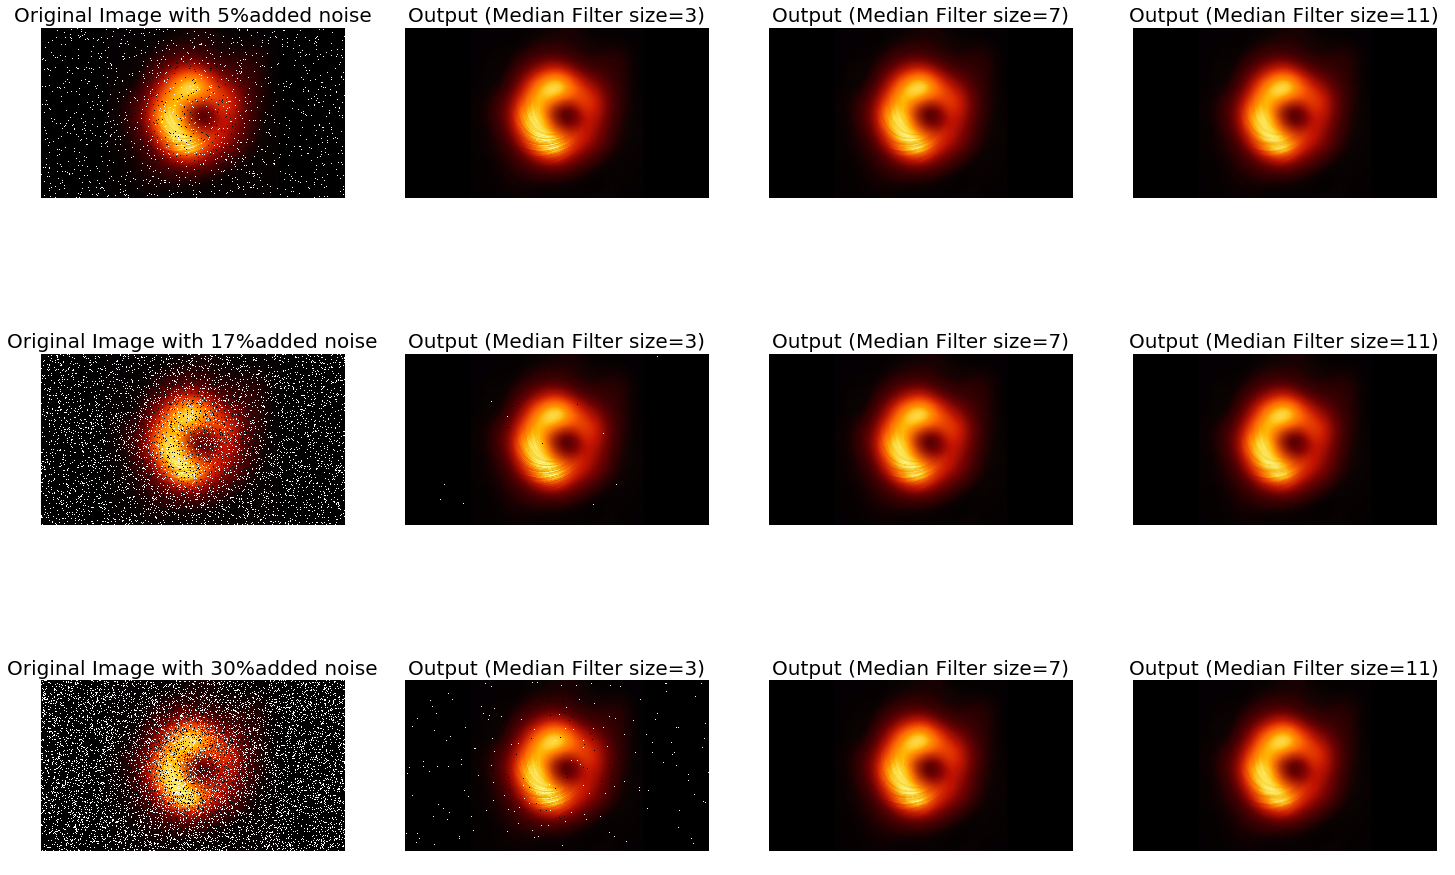

In [36]:
#median_filter
i = 1
pylab.figure(figsize=(25,35))
for prop_noise in np.linspace(0.05,0.3,3):
    im = Image.open('BH.jpg')
    # choose 5000 random locations inside image
    n = int(im.width * im.height * prop_noise)
    x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)
    for (x,y) in zip(x,y):
        im.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255))) # geenrate salt-and-pepper noise
    im.save('BH_noise' + str(prop_noise) + '.jpg')
    pylab.subplot(6,4,i)
    plot_image(im, 'Original Image with ' + str(int(100*prop_noise)) + '%added noise')
    i += 1
    for sz in [3,7,11]:
        im1 = im.filter(ImageFilter.MedianFilter(size=sz))
        pylab.subplot(6,4,i), plot_image(im1, 'Output (Median Filter size=' +  str(sz) + ')')
        i += 1
pylab.show()

estimated noise standard deviation = 0.14033639381705643


/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


PSNR (noisy) = 14.78
PSNR (slow) = 21.04
PSNR (fast) = 20.40


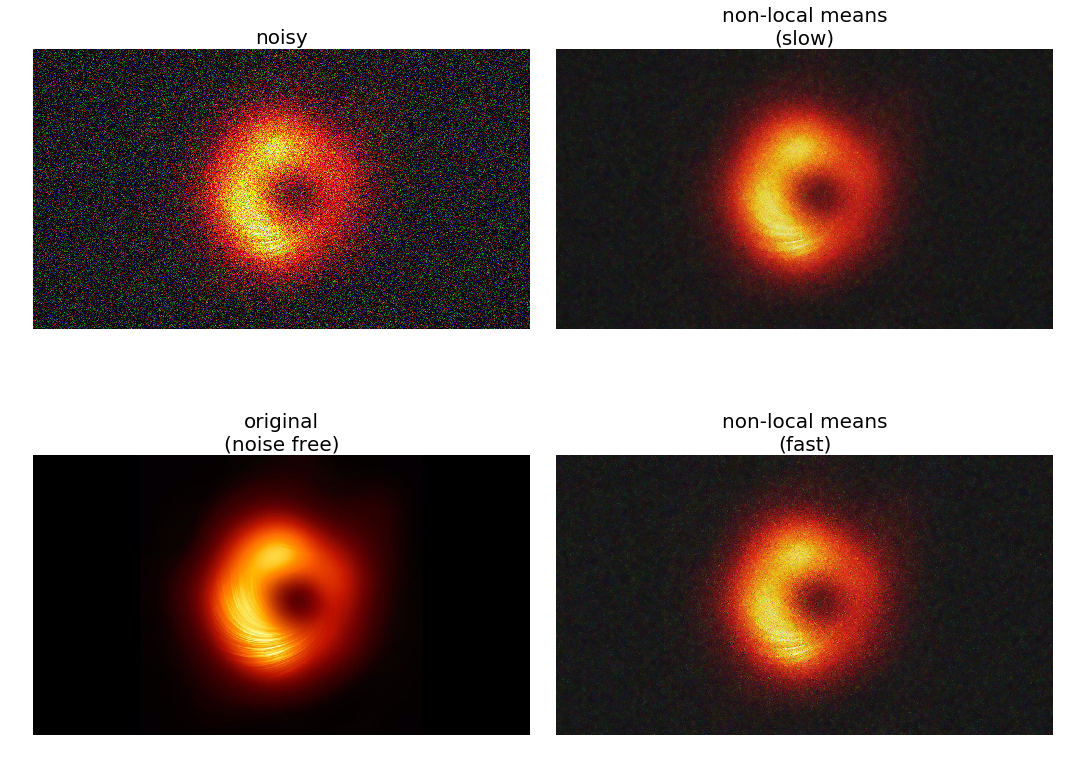

In [37]:
#using_non_local_means
def plot_image_axes(image, axes, title):
    axes.imshow(image)
    axes.axis('off')
    axes.set_title(title, size=20)
    
parrot = img_as_float(imread('BH.jpg'))
sigma = 0.25
noisy = parrot + sigma * np.random.standard_normal(parrot.shape)
noisy = np.clip(noisy, 0, 1)
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print("estimated noise standard deviation = {}".format(sigma_est))
# estimated noise standard deviation = 0.22048519002358943
patch_kw = dict(patch_size=5, # 5x5 patches
patch_distance=6, # 13x13 search area
multichannel=True)
# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
**patch_kw)
# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
**patch_kw)
fig, axes = pylab.subplots(nrows=2, ncols=2, figsize=(15, 12), sharex=True,
sharey=True)
plot_image_axes(noisy, axes[0, 0], 'noisy')
plot_image_axes(denoise, axes[0, 1], 'non-local means\n(slow)')
plot_image_axes(parrot, axes[1, 0], 'original\n(noise free)')
plot_image_axes(denoise_fast, axes[1, 1], 'non-local means\n(fast)')
fig.tight_layout()
# PSNR metric values
psnr_noisy = compare_psnr(parrot, noisy)
psnr = compare_psnr(parrot, denoise.astype(np.float64))
psnr_fast = compare_psnr(parrot, denoise_fast.astype(np.float64))
print("PSNR (noisy) = {:0.2f}".format(psnr_noisy))
print("PSNR (slow) = {:0.2f}".format(psnr))
print("PSNR (fast) = {:0.2f}".format(psnr_fast))
# PSNR (noisy) = 13.04 # PSNR (slow) = 26.25 # PSNR (fast) = 25.84
pylab.show()

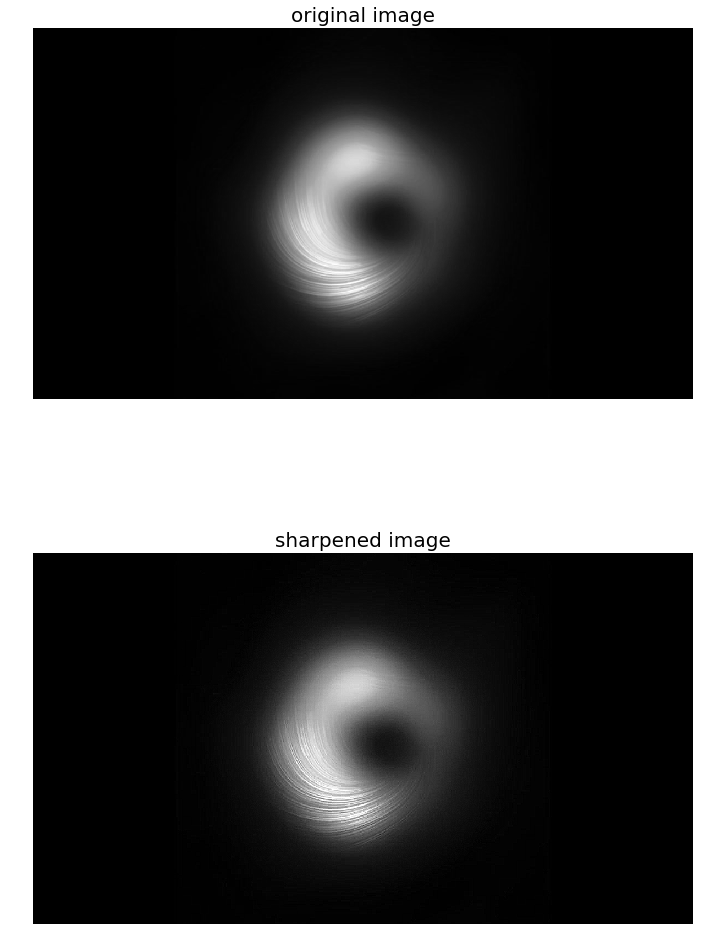

In [38]:
#Sharpening with Laplacian
from skimage.filters import laplace
im = rgb2gray(imread('BH.jpg'))
im1 = np.clip(laplace(im) + im, 0, 1)
pylab.figure(figsize=(10,15))
pylab.subplot(211), plot_image(im, 'original image')
pylab.subplot(212), plot_image(im1, 'sharpened image')
pylab.tight_layout()
pylab.show()

<Figure size 432x288 with 0 Axes>

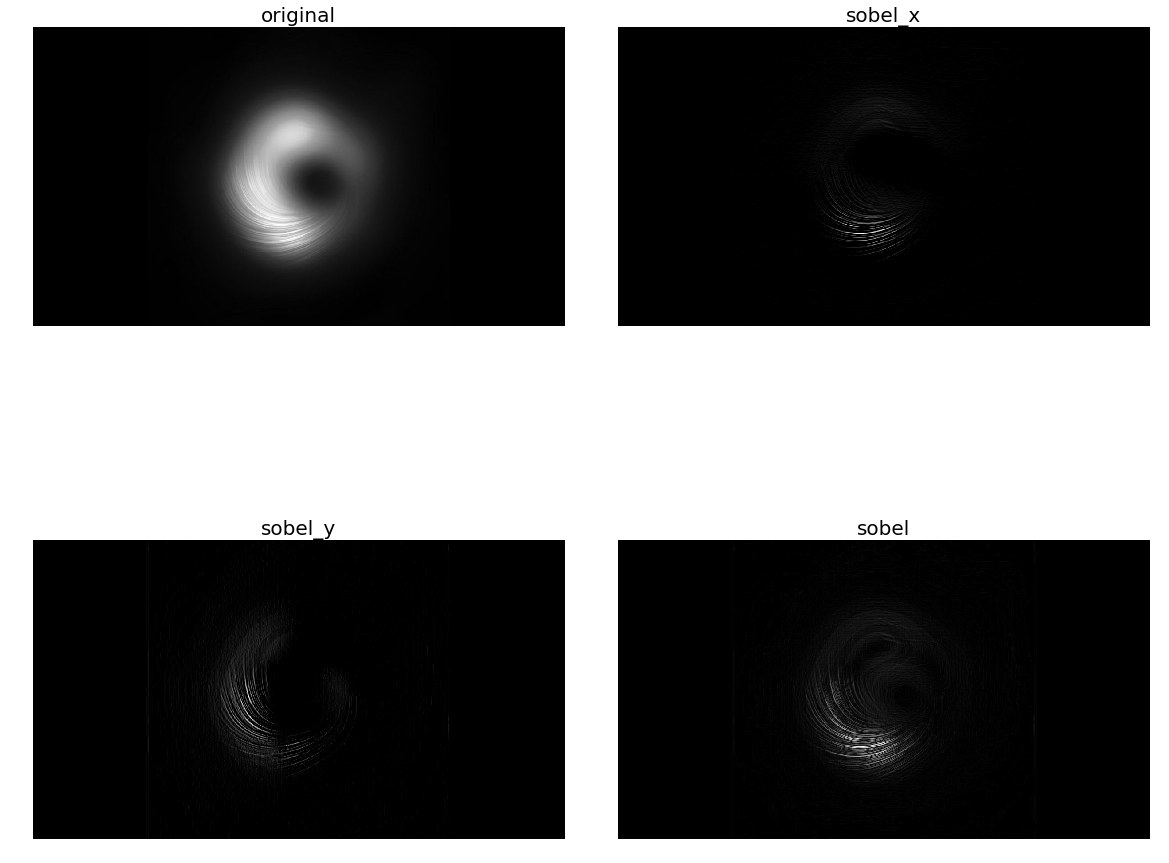

In [40]:
### Sobel edge detector with scikit-image
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
im = rgb2gray(imread('BH.jpg')) # RGB image to gray scale
pylab.gray()
pylab.figure(figsize=(20,18))
pylab.subplot(2,2,1)
plot_image(im, 'original')
pylab.subplot(2,2,2)
edges_x = filters.sobel_h(im)
plot_image(np.clip(edges_x,0,1), 'sobel_x')
pylab.subplot(2,2,3)
edges_y = filters.sobel_v(im)
plot_image(np.clip(edges_y,0,1), 'sobel_y')
pylab.subplot(2,2,4)
edges = filters.sobel(im)
plot_image(np.clip(edges,0,1), 'sobel')
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

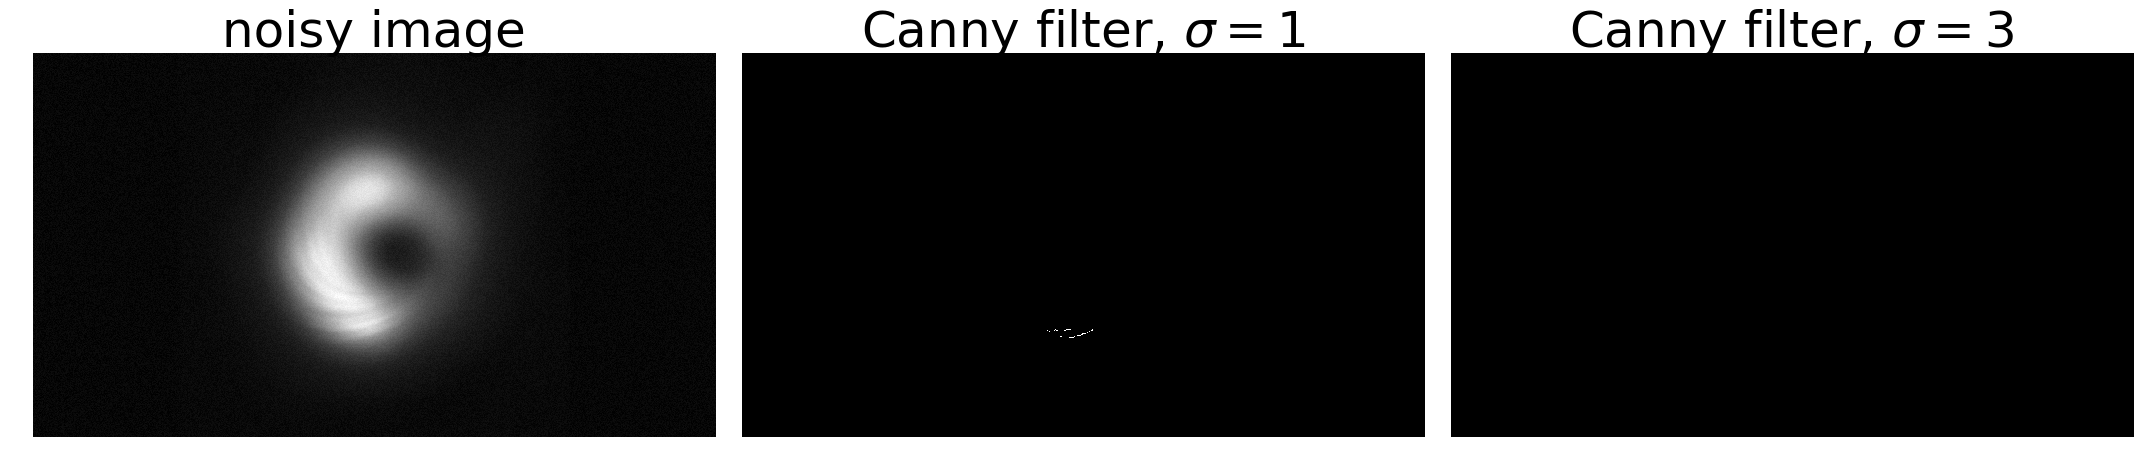

In [41]:
#Canny edge detector with scikit-image
im = rgb2gray(imread('BH.jpg'))
im = ndimage.gaussian_filter(im, 4)
im += 0.05 * np.random.random(im.shape)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=2)
fig, (axes1, axes2, axes3) = pylab.subplots(nrows=1, ncols=3, figsize=(30,
12), sharex=True, sharey=True)
axes1.imshow(im, cmap=pylab.cm.gray), axes1.axis('off'),
axes1.set_title('noisy image', fontsize=50)
axes2.imshow(edges1, cmap=pylab.cm.gray), axes2.axis('off')
axes2.set_title('Canny filter, $\sigma=1$', fontsize=50)
axes3.imshow(edges2, cmap=pylab.cm.gray), axes3.axis('off')
axes3.set_title('Canny filter, $\sigma=3$', fontsize=50)
fig.tight_layout()
pylab.show()

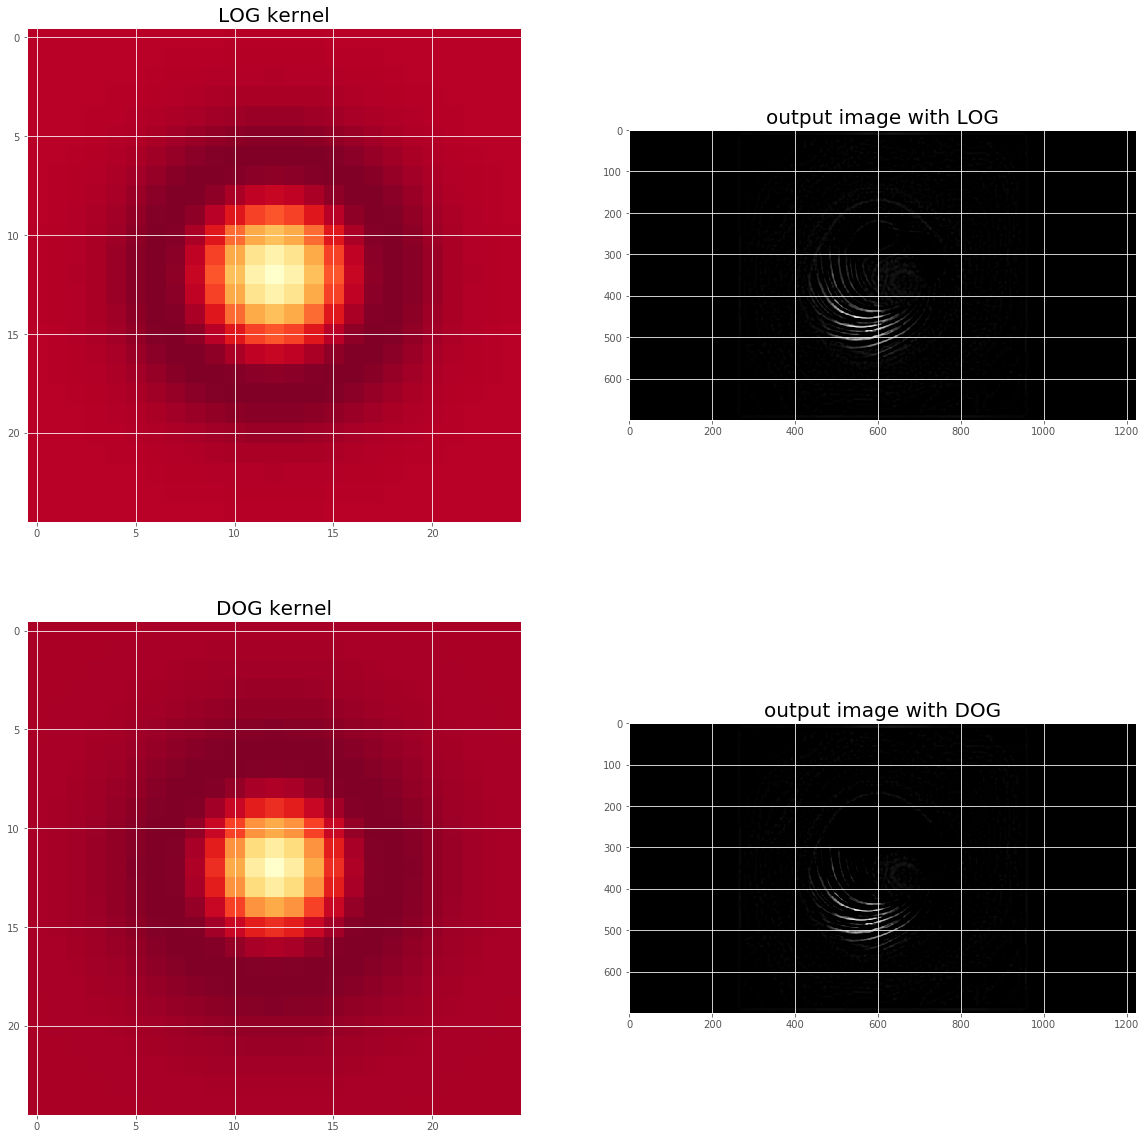

In [44]:
#The LoG and DoG filters

from scipy.signal import convolve2d
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter
from numpy import pi

def plot_kernel(kernel, s, name):
    pylab.imshow(kernel, cmap='YlOrRd')

def LOG(k=12, s=3):
    n = 2*k+1 # size of the kernel
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            kernel[i,j] = -(1-((i-k)**2+(j-k)**2)/(2.*s**2))*np.exp(-((i-k)**2+(j-k)**2)/(2.*s**2))/(pi*s**4)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()),3)
    return kernel

def DOG(k=12, s=3):
    n = 2*k+1 # size of the kernel
    s1, s2 = s * np.sqrt(2), s / np.sqrt(2)
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            kernel[i,j] = np.exp(-((i-k)**2+(j-k)**2)/(2.*s1**2))/(2*pi*s1**2) - np.exp(-((i-k)**2+(j-k)**2)/(2.*s2**2))/(2*pi*s2**2)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()),3)
    return kernel

s = 3 # sigma value for LoG
img = rgb2gray(imread('BH.jpg'))
kernel = LOG()
outimg = convolve2d(img, kernel)
pylab.figure(figsize=(20,20))
pylab.subplot(221), pylab.title('LOG kernel', size=20), plot_kernel(kernel, s, 'DOG')
pylab.subplot(222), pylab.title('output image with LOG', size=20)
pylab.imshow(np.clip(outimg,0,1), cmap='gray') # clip the pixel values in between 0 and 1
kernel = DOG()
outimg = convolve2d(img, DOG())
pylab.subplot(223), pylab.title('DOG kernel', size=20), plot_kernel(kernel, s, 'DOG')
pylab.subplot(224), pylab.title('output image with DOG', size=20)
pylab.imshow(np.clip(outimg,0,1), cmap='gray')
pylab.show()    

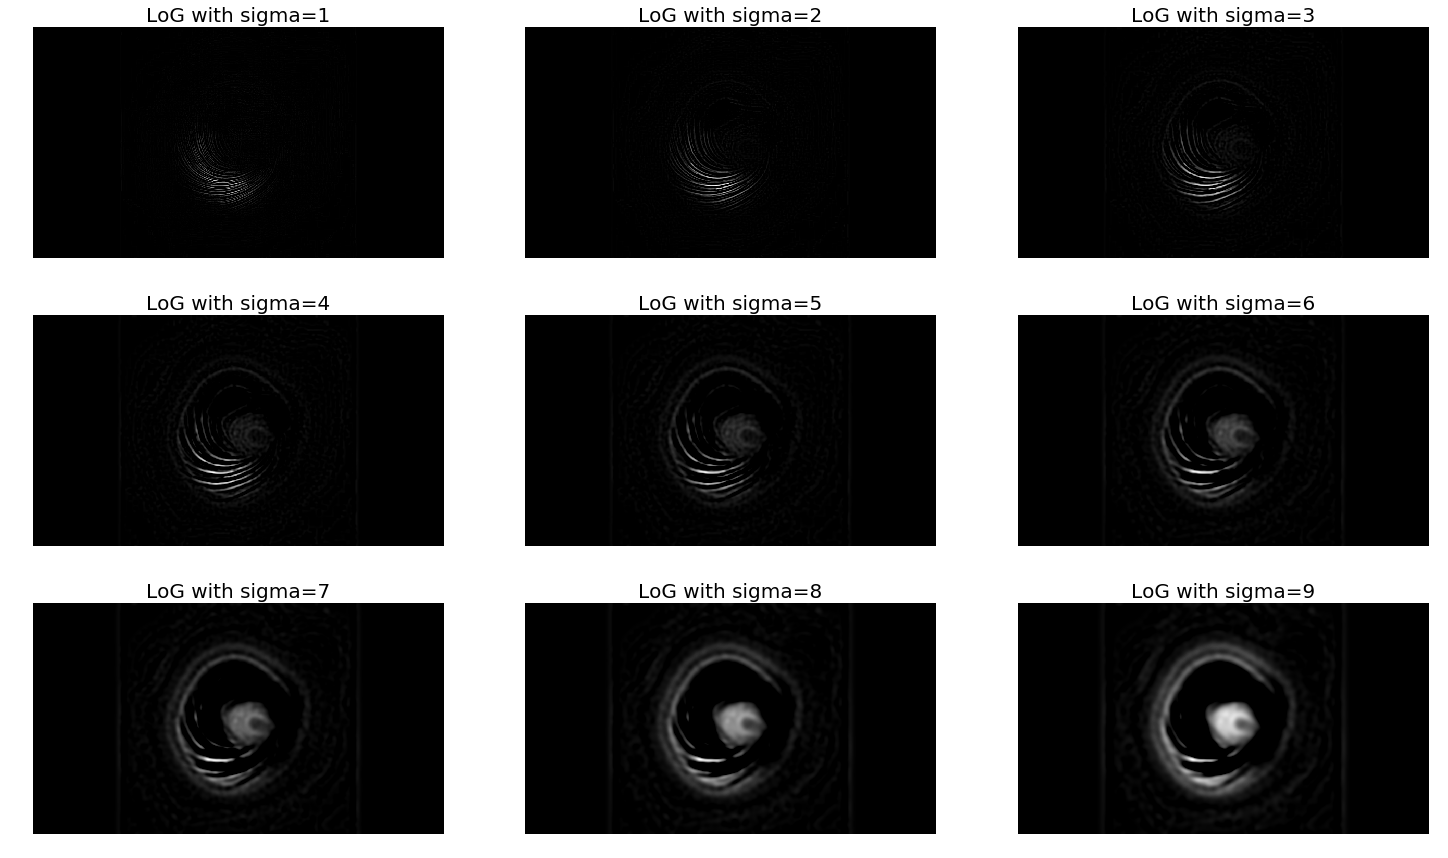

In [45]:
#The LoG filter with the SciPy ndimage module
img = rgb2gray(imread('BH.jpg'))
fig = pylab.figure(figsize=(25,15))
pylab.gray() # show the filtered result in grayscale
for sigma in range(1,10):
    pylab.subplot(3,3,sigma)
    img_log = ndimage.gaussian_laplace(img, sigma=sigma)
    pylab.imshow(np.clip(img_log,0,1)), pylab.axis('off')
    pylab.title('LoG with sigma=' + str(sigma), size=20)
pylab.show()

/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")
/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


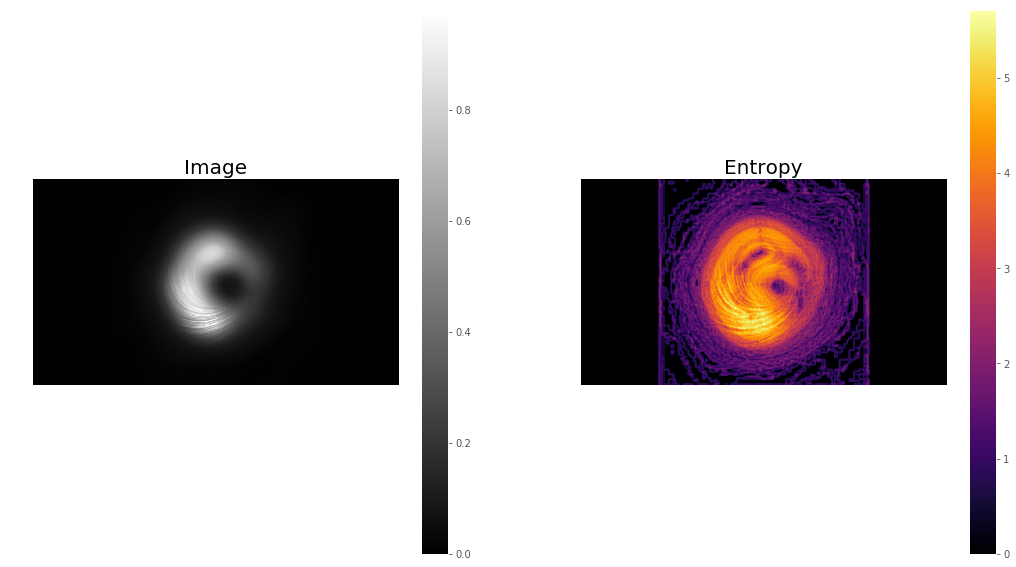

In [46]:
#Computing the local entropy
from skimage.morphology import disk
from skimage.filters.rank import entropy
image = rgb2gray(imread('BH.jpg'))
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(18, 10), sharex=True, sharey=True)
fig.colorbar(axes1.imshow(image, cmap=pylab.cm.gray), ax=axes1)
axes1.axis('off'), axes1.set_title('Image', size=20), axes1.set_adjustable('box-forced')
fig.colorbar(axes2.imshow(entropy(image, disk(5)), cmap=pylab.cm.inferno), ax=axes2)
axes2.axis('off'), axes2.set_title('Entropy', size=20), axes2.set_adjustable('box-forced')
pylab.show()

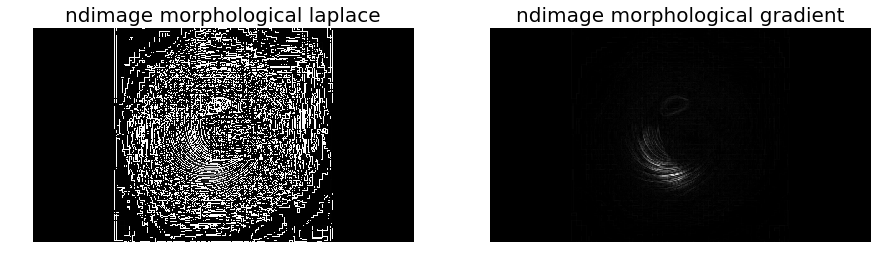

In [49]:
#computing the morphological laplace
im = imread('BH.jpg')[...,2]
im_g = ndimage.morphological_gradient(im, size=(3,3))
im_l = ndimage.morphological_laplace(im, size=(5,5))
pylab.figure(figsize=(15,10))
pylab.subplot(121), pylab.title('ndimage morphological laplace', size=20), pylab.imshow(im_l)
pylab.axis('off')
pylab.subplot(122), pylab.title('ndimage morphological gradient', size=20),
pylab.imshow(im_g)
pylab.axis('off')
pylab.show()

<Figure size 432x288 with 0 Axes>

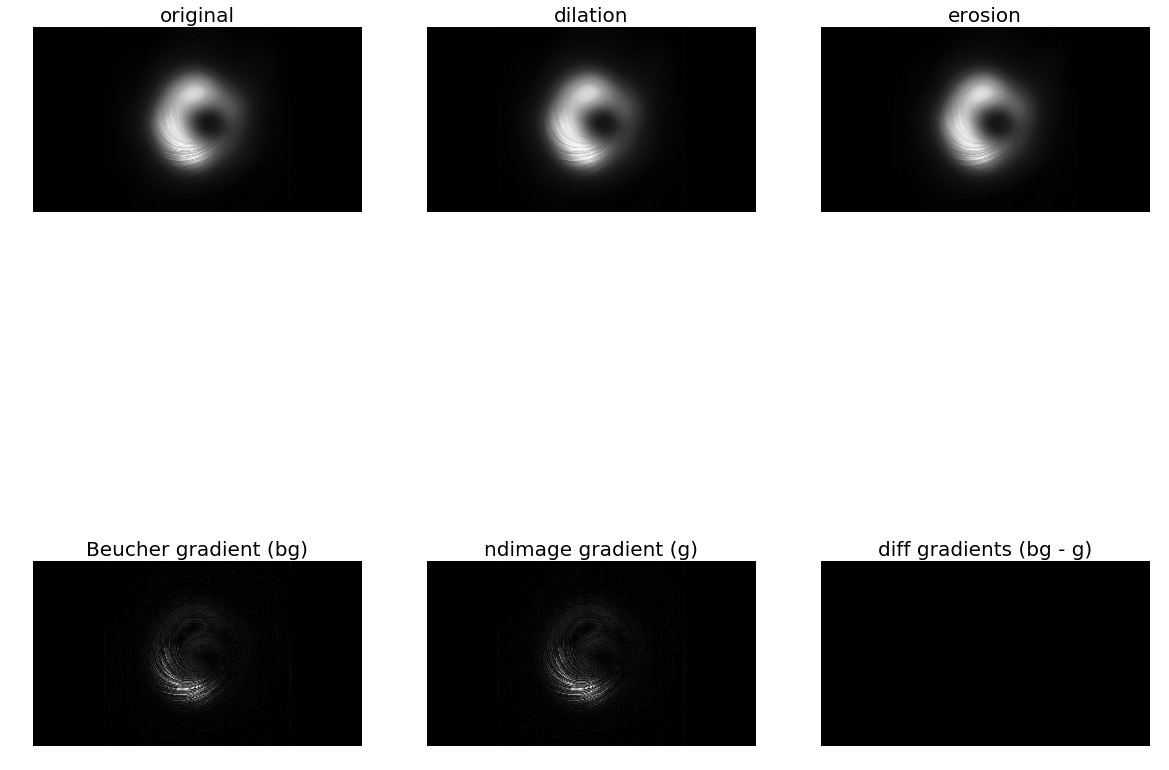

In [50]:
### Computing the morphological Beucher gradient
from scipy import ndimage
im = rgb2gray(imread('BH.jpg'))
im_d = ndimage.grey_dilation(im, size=(3,3))
im_e = ndimage.grey_erosion(im, size=(3,3))
im_bg = im_d - im_e
im_g = ndimage.morphological_gradient(im, size=(3,3))
pylab.gray()
pylab.figure(figsize=(20,18))
pylab.subplot(231), pylab.imshow(im), pylab.title('original', size=20),
pylab.axis('off')
pylab.subplot(232), pylab.imshow(im_d), pylab.title('dilation', size=20),
pylab.axis('off')
pylab.subplot(233), pylab.imshow(im_e), pylab.title('erosion', size=20),
pylab.axis('off')
pylab.subplot(234), pylab.imshow(im_bg), pylab.title('Beucher gradient (bg)', size=20), pylab.axis('off')
pylab.subplot(235), pylab.imshow(im_g), pylab.title('ndimage gradient (g)', size=20), pylab.axis('off')
pylab.subplot(236), pylab.title('diff gradients (bg - g)', size=20), pylab.imshow(im_bg - im_g) 
pylab.axis('off')
pylab.show()

In [53]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

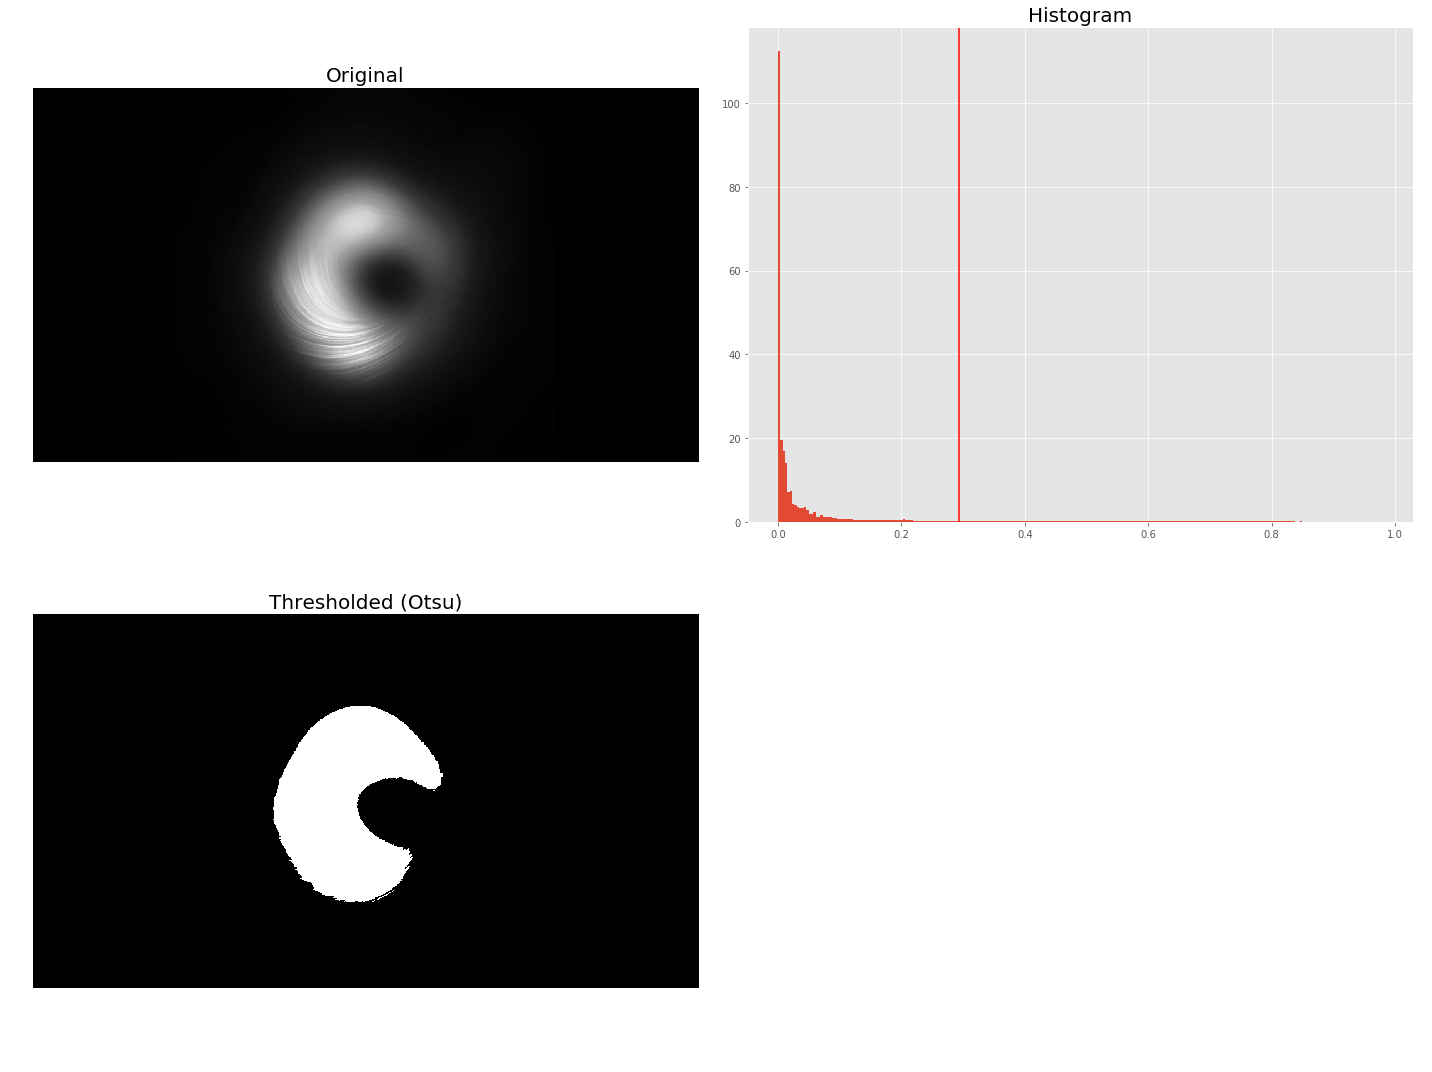

In [55]:
#Thresholding and Otsu's segmentation
image =  rgb2gray(imread('BH.jpg')) #data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 2, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original', size=20)
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256, normed=True)
ax[1].set_title('Histogram', size=20)
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Otsu)', size=20)
ax[2].axis('off')

ax[3].axis('off')

plt.tight_layout()
plt.show()

/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/u/rshyaamp/.conda/envs/py368nb/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


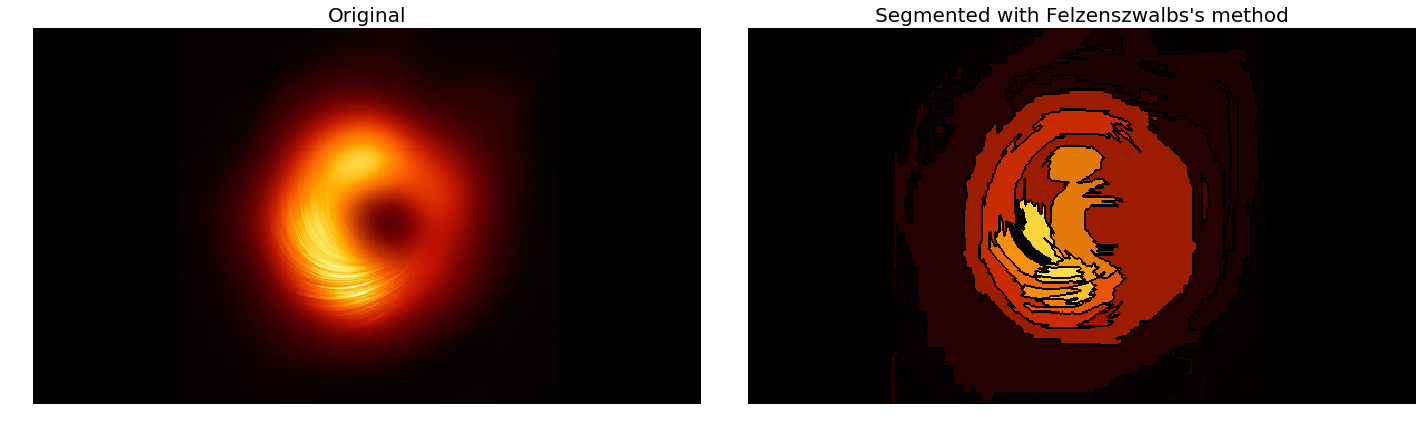

In [56]:
## Felzenszwalb's efficient graph-based image segmentation

from matplotlib.colors import LinearSegmentedColormap
for imfile in ['BH.jpg']:
    img = img_as_float(imread(imfile)[::2, ::2, :3])
    plt.figure(figsize=(20,10))
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=100) #300
    borders = find_boundaries(segments_fz)
    unique_colors = np.unique(segments_fz.ravel())
    segments_fz[borders] = -1 #len(unique_colors)
    colors = [np.zeros(3)]
    for color in unique_colors:
        colors.append(np.mean(img[segments_fz == color], axis=0))    
    cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original', size=20)
    plt.axis('off') 
    plt.subplot(122)
    plt.imshow(segments_fz, cmap=cm)
    plt.title('Segmented with Felzenszwalbs\'s method', size=20)
    plt.axis('off')   
    plt.tight_layout()
    plt.show()

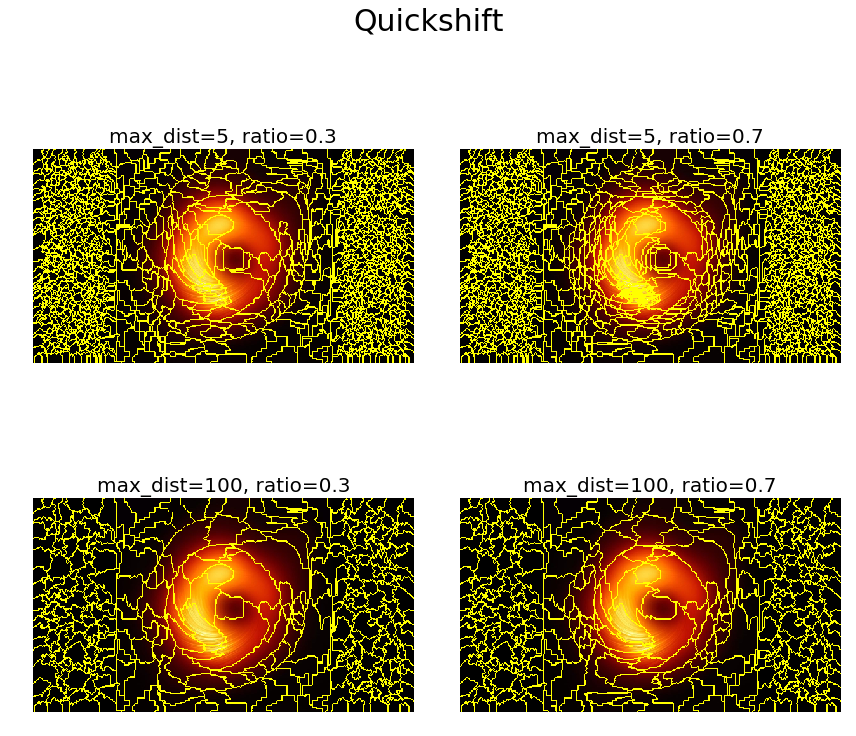

In [57]:
#segmentationwithquickshift

plt.figure(figsize=(12,12))
i = 1
for max_dist in [5, 100]:
    for ratio in [0.3, 0.7]:
        plt.subplot(2,2,i)
        segments_quick = quickshift(img, kernel_size=3, max_dist=max_dist, ratio=ratio)
        plot_image(mark_boundaries(img, segments_quick), 'max_dist=' + str(max_dist) + ', ratio=' + str(ratio))
        i += 1
plt.suptitle('Quickshift', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

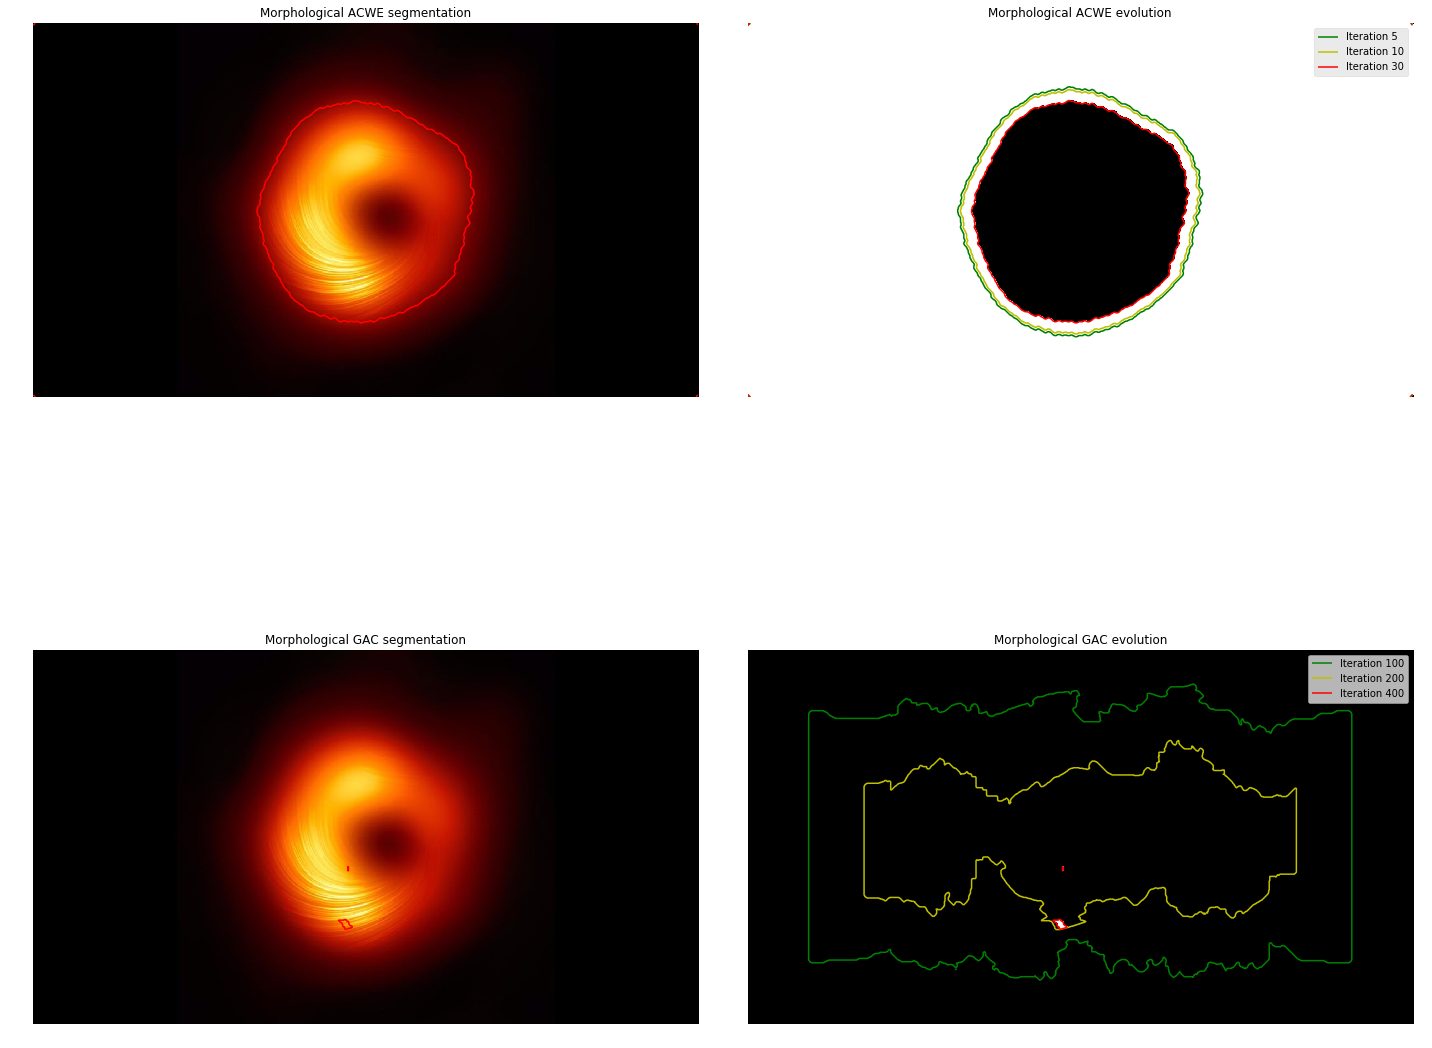

(None, None)

In [58]:
#Morphologicalsnakes
from skimage.segmentation import (morphological_chan_vese, morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient, checkerboard_level_set)

def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))
       
    return _store

# Morphological ACWE
image = imread('BH.jpg')
image_gray = rgb2gray(image)
# initial level set
init_lvl_set = checkerboard_level_set(image_gray.shape, 6)
# list with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
lvl_set = morphological_chan_vese(image_gray, 30, init_level_set=init_lvl_set, smoothing=3, iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
axes[0].imshow(image, cmap="gray"), axes[0].set_axis_off(),
axes[0].contour(lvl_set, [0.5], colors='r')
axes[0].set_title("Morphological ACWE segmentation", fontsize=12)
axes[1].imshow(lvl_set, cmap="gray"), axes[1].set_axis_off()
contour = axes[1].contour(evolution[5], [0.5], colors='g')
contour.collections[0].set_label("Iteration 5")
contour = axes[1].contour(evolution[10], [0.5], colors='y')
contour.collections[0].set_label("Iteration 10")
contour = axes[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration " + str(len(evolution)-1))
axes[1].legend(loc="upper right"), axes[1].set_title("Morphological ACWE evolution", fontsize=12)
                                                     
# Morphological GAC
image = imread('BH.jpg')
image_gray = rgb2gray(image)
gimage = inverse_gaussian_gradient(image_gray)
# initial level set
init_lvl_set = np.zeros(image_gray.shape, dtype=np.int8)
init_lvl_set[10:-10, 10:-10] = 1
# list with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
lvl_set = morphological_geodesic_active_contour(gimage, 400, init_lvl_set, smoothing=1, balloon=-1, threshold=0.7, iter_callback=callback)
axes[2].imshow(image, cmap="gray"), axes[2].set_axis_off(),
axes[2].contour(lvl_set, [0.5], colors='r')
axes[2].set_title("Morphological GAC segmentation", fontsize=12)
axes[3].imshow(lvl_set, cmap="gray"), axes[3].set_axis_off()
contour = axes[3].contour(evolution[100], [0.5], colors='g')
contour.collections[0].set_label("Iteration 100")
contour = axes[3].contour(evolution[200], [0.5], colors='y')
contour.collections[0].set_label("Iteration 200")
contour = axes[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration " + str(len(evolution)-1))
axes[3].legend(loc="upper right"), axes[3].set_title("Morphological GAC evolution", fontsize=12)
fig.tight_layout(), plt.show()



